In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Part I - Ford GoBike Data Exploration
## by Tella Adetayo

## Introduction
Ford GoBike is the Bay Area's bike sharing system. Bay Area Bike Share was introduced in 2013 as a pilot program for the region, with 700 bikes and 70 stations across San Fransico and San Jose. 

The programs consists of bikes which are specially designed that can be locked in a network of docking station, it can be unlocked in one station and locked in another station. The bikes are available 24 hours per day, 7 days per week and 356 days a year.


## Preliminary Wrangling


In [2]:
# import all the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Gathering

In [3]:
# load the dataset in to pandas dataframe
GoBike_df = pd.read_csv("Downloads/201902-fordgobike-tripdata.csv")

## Accessing

In [4]:
# print the shape of the dataframe and the first five rows of the dataframe
print(GoBike_df.shape)
GoBike_df.head()

(183412, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
# Check the general info of the dataset
GoBike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
# Assigning the sum of the null values 
null_values = GoBike_df.isnull().sum()

In [7]:
# Checking the null values greater than 0
null_values[null_values > 0]

start_station_id       197
start_station_name     197
end_station_id         197
end_station_name       197
member_birth_year     8265
member_gender         8265
dtype: int64

In [8]:
# Descriptive statistics of the dataframe
GoBike_df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration_sec,183412.0,726.078435,1794.389780,61.000000,325.000000,514.000000,796.000000,85444.000000
start_station_id,183215.0,138.590427,111.778864,3.000000,47.000000,104.000000,239.000000,398.000000
start_station_latitude,183412.0,37.771223,0.099581,37.317298,37.770083,37.780760,37.797280,37.880222
start_station_longitude,183412.0,-122.352664,0.117097,-122.453704,-122.412408,-122.398285,-122.286533,-121.874119
end_station_id,183215.0,136.249123,111.515131,3.000000,44.000000,100.000000,235.000000,398.000000
end_station_latitude,183412.0,37.771427,0.099490,37.317298,37.770407,37.781010,37.797320,37.880222
end_station_longitude,183412.0,-122.352250,0.116673,-122.453704,-122.411726,-122.398279,-122.288045,-121.874119
bike_id,183412.0,4472.906375,1664.383394,11.000000,3777.000000,4958.000000,5502.000000,6645.000000
member_birth_year,175147.0,1984.806437,10.116689,1878.000000,1980.000000,1987.000000,1992.000000,2001.000000


In [9]:
# Checking the duplicates values
sum(GoBike_df.duplicated())

0

In [10]:
# Checking the values counts of the user_trip column
GoBike_df["user_type"].value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [11]:
# Checking the values counts of the bike_share_for_all_trip column
GoBike_df["bike_share_for_all_trip"].value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

In [12]:
# Checking the value counts of the start_station_name column
GoBike_df["start_station_name"].value_counts()

Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
                                                             ... 
Willow St at Vine St                                            9
Parker Ave at McAllister St                                     7
Palm St at Willow St                                            4
21st Ave at International Blvd                                  4
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

In [13]:
# Number of unique values in the start_station_name column
GoBike_df["start_station_name"].nunique()

329

In [14]:
# Checking the value counts of the end_station_name column
GoBike_df["end_station_name"].value_counts()

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4857
Market St at 10th St                                         3973
Montgomery St BART Station (Market St at 2nd St)             3647
San Francisco Ferry Building (Harry Bridges Plaza)           3368
Powell St BART Station (Market St at 4th St)                 2997
                                                             ... 
Parker Ave at McAllister St                                     9
Palm St at Willow St                                            7
16th St Depot                                                   6
21st Ave at International Blvd                                  6
Willow St at Vine St                                            5
Name: end_station_name, Length: 329, dtype: int64

In [15]:
# Number of unique values in the end_station_name column
GoBike_df["end_station_name"].nunique()

329

#### Quality

###### `GoBike_df` table
- Erroneous datatype in start_time, end_time, memeber_gender, bake_share_for_all_trip, user_type
- Null values in the start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year    member_gender
- The week and day can be extracted from the start_time column

## Clean

In [16]:
GoBike_df_copy = GoBike_df.copy()

### Quality

##### `GoBike_df` table: Null values in the start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year member_gender

#### Define

Drop the null values in the start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year, member_gender

##### Code

In [17]:
# Drop the null values
GoBike_df_copy.dropna(inplace = True)

##### Test

In [18]:
# Checking to confirm if all the null values are dropped
GoBike_df_copy.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

##### `tripdata` table: Erroneous datatype in start_time, end_time, member_gender, bake_share_for_all_trip, user_type

#### Define

Change the datatype of start_time, end_time to datatime while member_gender, bake_share_for_all and user_type to category

##### Code

In [19]:
# Change the datatypes of the columns to datetime and category
GoBike_df_copy["start_time"] = pd.to_datetime(GoBike_df_copy["start_time"])
GoBike_df_copy["end_time"] = pd.to_datetime(GoBike_df_copy["end_time"])
GoBike_df_copy["bike_share_for_all_trip"] = GoBike_df_copy["bike_share_for_all_trip"].astype("category")
GoBike_df_copy["member_gender"] = GoBike_df_copy["member_gender"].astype("category")
GoBike_df_copy["user_type"] = GoBike_df_copy["user_type"].astype("category")

##### Test

In [20]:
GoBike_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

#### `GoBike_df`: The week and day can be extracted from the start_time column

#### Define

Extract the week and day from the start_time column

##### Code

In [73]:
days_of_week = {
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday", 
    5: "Saturday",
    6: "Sunday"
}

GoBike_df_copy["weekday_name"] = GoBike_df_copy["start_time"].dt.weekday.map(days_of_week)

GoBike_df_copy["hour"] = GoBike_df_copy["start_time"].dt.hour
GoBike_df_copy["minutes"] = GoBike_df_copy["start_time"].dt.minute

##### Test

In [74]:
GoBike_df_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,weekday_name,hour,duration_min,minutes
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,Thursday,17,869.750000,32
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,Thursday,12,1030.900000,13
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,Thursday,17,608.166667,54
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,Thursday,23,26.416667,54
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,Thursday,23,29.883333,49


In [23]:
# Checking the shape of dataset after premilinary wrangling
print(GoBike_df_copy.shape)

(174952, 18)


### What is the structure of your dataset?

The dataset have 174952 rows after some wrangling and 19 columns. The columns are duration_sec and bike_id which the datatype is int64, start_time and end_time which both their datatype are in datetime, user_type, member_gender and bike_share_for_all_trips are in category while start_station_id, start_station_name, start_station_latitude,start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude are float64, the weekday_name is in object and the hour column is in int64.


### What is/are the main feature(s) of interest in your dataset?

The main features of interest in the dataset are:
- user_type
- member_birth_year
- member_gender
- bike_share_for_all_trip
- hour
- weekday_name

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The duration_sec, start_time, end_time and bike_id should in supporting my investigation into my features of interest.

## Univariate Exploration

### How often is sharing of bikes for trips?

In [24]:
# Function for a countplot
def plot_count(x, **kwargs):
    base_color = sns.color_palette()[0]
    sns.countplot(x=x, color = base_color)

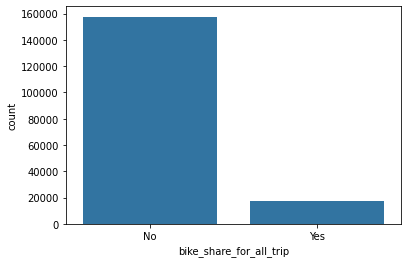

In [25]:
# Plotting the countplot of bike_share_for_all_trip column
plot_count(GoBike_df_copy["bike_share_for_all_trip"]);

###### Observation
- Sharing of bikes with other riders is not a common thing because from the visualization close to 160000 doesn't share rides.

### What type of user are the people who took a trip?

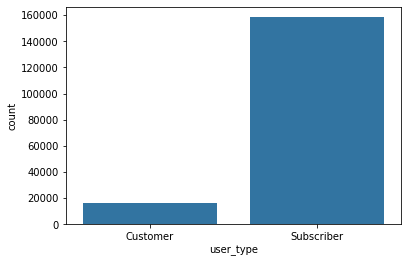

In [26]:
# Plot the user_type column
plot_count(GoBike_df_copy["user_type"]);

###### Observation
- There are only two types of users which are the customer and subscriber and the most common user are the subscriber which are way above the customer

### What is the average duration for every trips?

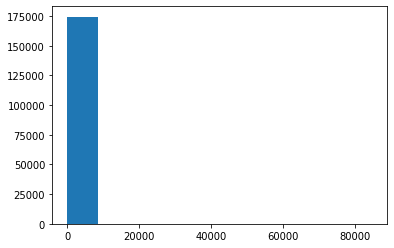

In [27]:
# Plot the average duration of every trips
plt.hist(data = GoBike_df_copy, x = "duration_sec");

In [28]:
# Descriptive statistics of the duration_sec column
GoBike_df_copy["duration_sec"].describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

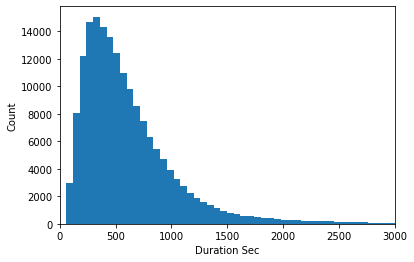

In [29]:
# Plot the distribution of the duration sec
# bins_edges are the bins created to add to the plot
bin_edges = np.arange(0, GoBike_df_copy["duration_sec"].max()+60, 60)
plt.hist(data = GoBike_df_copy, x = "duration_sec", bins = bin_edges)
plt.xlim(0, 3000)
plt.xlabel("Duration Sec")
plt.ylabel("Count");

In [30]:
# logarithm of the descriptive statistics of the duration_sec column
np.log10(GoBike_df_copy["duration_sec"].describe())

count    5.242919
mean     2.847574
std      3.215427
min      1.785330
25%      2.509203
50%      2.707570
75%      2.897077
max      4.927103
Name: duration_sec, dtype: float64

In [31]:
# Dividing the duration_sec by 60 and assigning it to the duration_min
GoBike_df_copy["duration_min"] = GoBike_df_copy["duration_sec"]/60

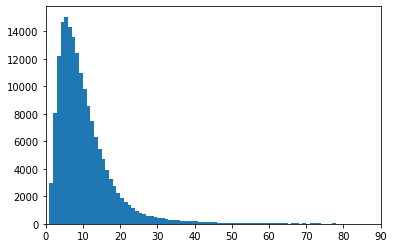

In [32]:
# Plot the histogram of the duration_min which contains bins
bin_edges = np.arange(0, GoBike_df_copy["duration_min"].max(), 1)
plt.hist(data = GoBike_df_copy, x = "duration_min", bins = bin_edges)
plt.xlim(0, 90);

###### Observation
- The first graph of the duration_sec column is difficult to understand. So it is plot with different bins in the second plot and the distribution of the data is left skewed, then I divide the duration_sec by 60 and assign it to the duration_min which resulted in the third plot. From the third plot the duration peak is around 10 minutes and the data is unimodal.

### What Gender took the most trips throughout the year?

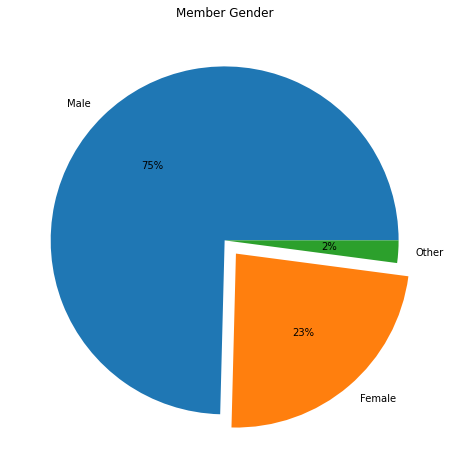

In [33]:
# Assign the value counts of the member_gender column to a new varibale
# Plot the piechart of the member_gender 
sorted_columns = GoBike_df_copy["member_gender"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sorted_columns, labels = sorted_columns.index, explode = (0, 0.1, 0), autopct = "%.0f%%")
plt.title("Member Gender")
plt.show();

###### Observation
- The most common gender in the datasets are the male is 75%, followed by female which are 23% and other which they are 2%.

### What day of the week has the highest starting time per rides?

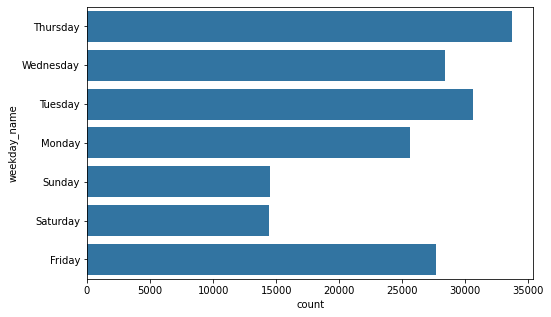

In [34]:
# Plot the countplot of the highest starting time
plt.figure(figsize=(8, 5))
base_color = sns.color_palette()[0]
sns.countplot(data = GoBike_df_copy, y = "weekday_name", color = base_color);

###### Observation
- Thursday is the day with highest rides followed by Tuesday and Wednesday which are all weekdays.

### What is/are the peak of the starting time for every rides?

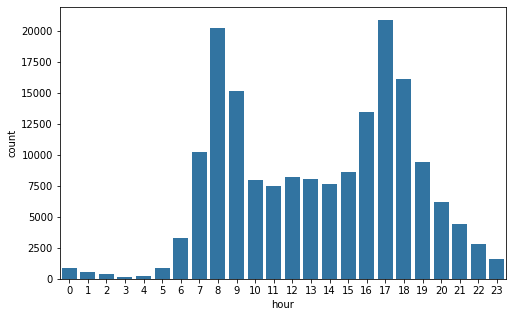

In [35]:
# Plot the barchart of the hour
plt.figure(figsize = (8, 5))
plot_count(GoBike_df_copy["hour"])

###### Observation
- The peak hours are 8 and 17 hours which means there is always a peak when people are going to work and coming back home from work.

### Insights Gained during Univariate Exploration

- Sharing of bikes for every trips is not a common thing and there are a lot of people that doesn't share bikes with others.
- The most common users are the subscribers which are followed by the customers.
- The duration_sec column was plotted at first which is unable to understood and then the bins were changed to minutes which shows that the distribution of the data are left skewed.
- The most common genders for every trips are the male, followed by the females and others which are unspecified genders.
- Thursday is the day with the most common rides and it shows that there are a lot rides during the weekdays.
- The peak hours for every rides are the 8 and 17 hours which are time people leave home in the morning and in the evening people get back home.

## Bivariate Exploration

### How common is sharing of trips among genders?

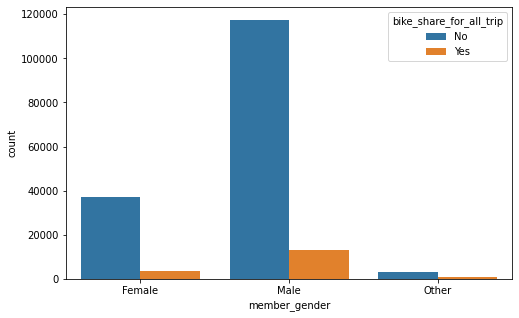

In [36]:
# Plot the barchart of the member gender 
plt.figure(figsize = (8, 5))
sns.countplot(data = GoBike_df_copy, x = "member_gender", hue = "bike_share_for_all_trip");

###### Observation
- All gender that are not likely share no rides are not likely to share no rides but the females are more open to sharing rides 

### What are the most user type for every days of the week? 

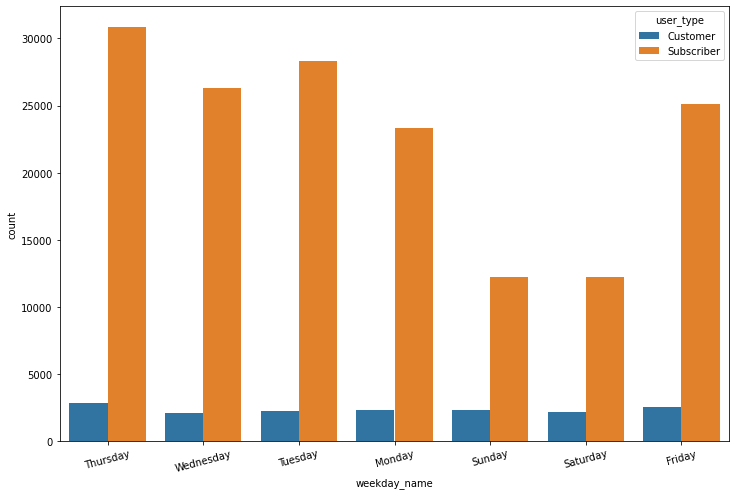

In [37]:
# Plot the clustered barchart of the user type 
plt.figure(figsize = (12, 8))
sns.countplot(data = GoBike_df_copy, x = "weekday_name", hue = "user_type")
plt.xticks(rotation = 15);

###### Observation
- The most common users are the subscribers while there are few customers for the company.

### How distributed are the age of the each genders?

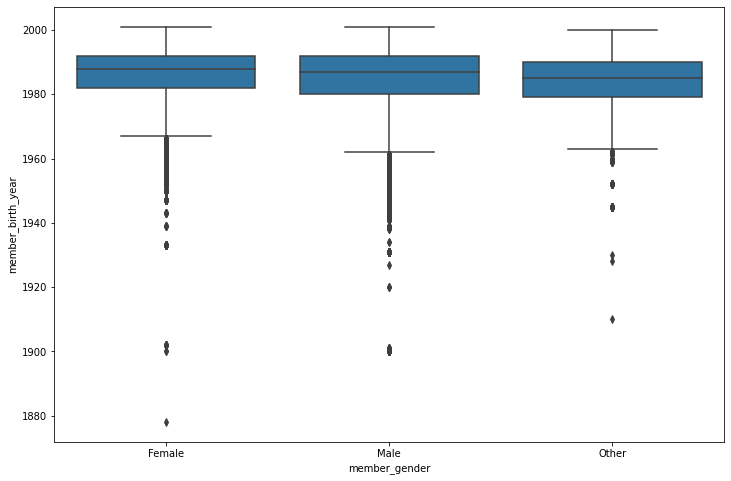

In [38]:
# Plot the boxplot of the age of the genders
plt.figure(figsize = (12, 8))
base_color = sns.color_palette()[0]
sns.boxplot(data = GoBike_df_copy, x = "member_gender", y = "member_birth_year", color = base_color);

###### Observation
- From the visualizations the mean, median are both similar across all gender and there are a lot of outliers among the female gender which show that are people in the that gender are born before the the year 1980 that took a trip same with the male gender.

### What are the correlation between the variables in the dataset?

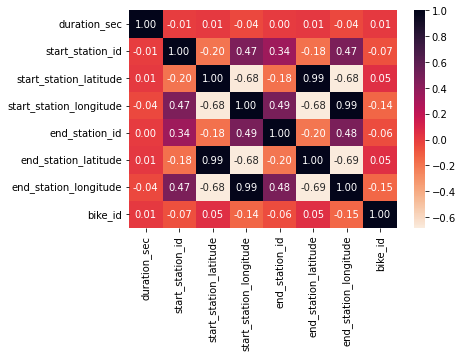

In [39]:
# Assign the numeric variables to new variable 
# plot the heatmap of the correlation
GoBike_stats = ['duration_sec', 'start_station_id', 'start_station_latitude',
       'start_station_longitude', 'end_station_id',
       'end_station_latitude', 'end_station_longitude', 'bike_id']

sns.heatmap(GoBike_df_copy[GoBike_stats].corr(), cmap = "rocket_r", annot = True, fmt = ".2f");

###### Observation
- There are strong correlation end_station_latitude and start_station_longitude, same with end_station_latitude and start_station_latitude which are only geographical positions so as one increase other also increase.

### How distributed are the bike id amongst genders?

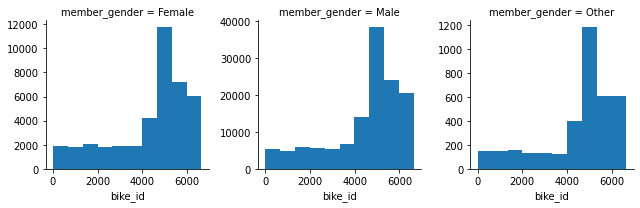

In [41]:
# Plot the facetgrid which uses the bike id
g = sns.FacetGrid(data = GoBike_df_copy, col = "member_gender", sharey = False)
g.map(plt.hist, "bike_id");

###### Observation
- The bike_id are unimodal across a gender though male took more trips which resulted in more bike_id.

### What are the top 10 station for starting trips?

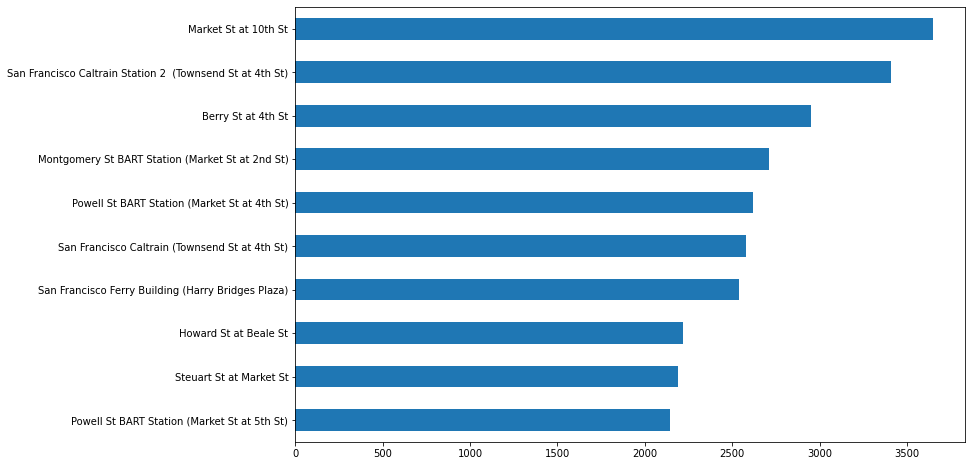

In [88]:
# Plot the top 10 station name for starting rides
plt.figure(figsize = (12, 8))
base_color = sns.color_palette()[0]
top10_start_station = GoBike_df_copy["start_station_name"].value_counts()[:10].sort_values()
top10_start_station.plot(kind = "barh", color = base_color);

###### Observation
- The start station for every ride are mostly at the market station followed by San Fransico Caltrain station 2 for most starting rides.

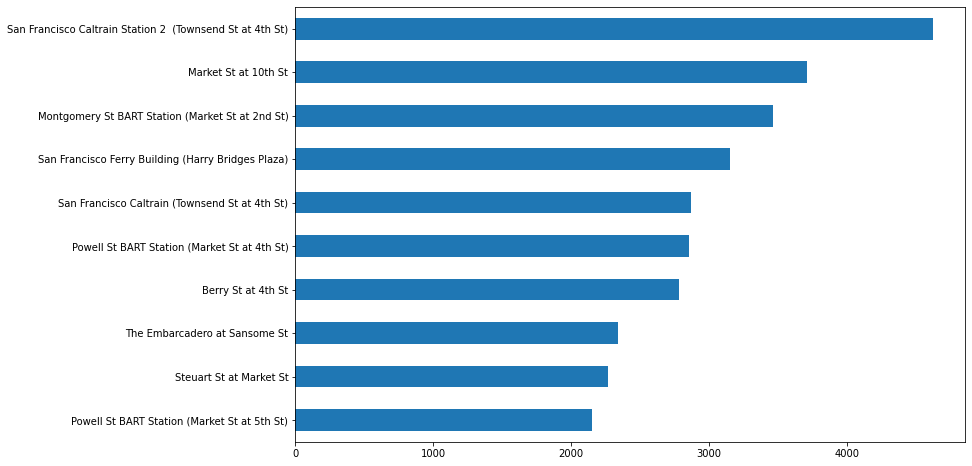

In [89]:
# Plot the top 10 station name of the ending ride
plt.figure(figsize = (12, 8))
base_color = sns.color_palette()[0]
top10_end_station = GoBike_df_copy["end_station_name"].value_counts()[:10].sort_values()
top10_end_station.plot(kind = "barh",  color = base_color);

###### Observation
- The end station rides are mostly at the San Fransico Caltrain Station 2 and Market Station which is the same as the starting station for every rides 

### Insights Gained From Bivariate Exploration
- No genders are more likely to share rides with other but females are more likely to.
- The subscribers are the most common users every day of the week while the customers represent a small part.
- The mean and median of all the genders are a bit similar but females have a lot of riders who are born earlier than 1980 same with the male but the female contain a rider which is born around the year 1880
- The Market station and San Fransico Caltrain 1 are the most common station where trips are started and trips are ended.

## Multivariate Exploration

### What is the average duration per minutes for every rides by user?


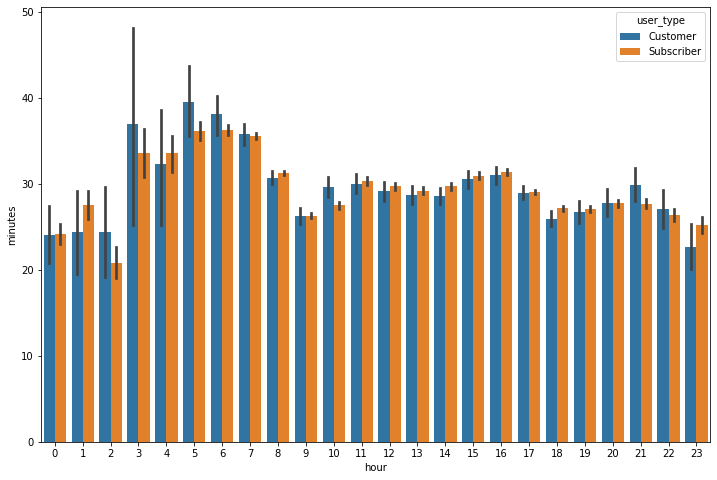

In [77]:
# plotting of barplot of the average duration per minutes
plt.figure(figsize = (12, 8))
sns.barplot(data = GoBike_df_copy, x = "hour", y = "minutes", hue = "user_type");

###### Observation
- The customer duration for every rides last longer than the subscribers almost every hour of the day.

### What is the average per minutes during the week?

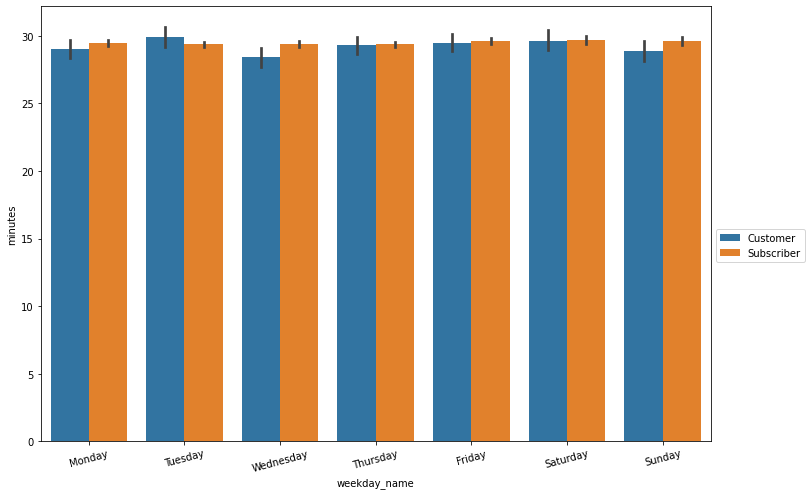

In [99]:
# plot the pointplot of the average per minutes
plt.figure(figsize = (12, 8))
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.barplot(data = GoBike_df_copy, y = "minutes", x = "weekday_name", hue = "user_type", order = days)
plt.xticks(rotation = 15)
plt.legend(bbox_to_anchor=(1.0, 0.5));

###### Observation
- There is no much difference between the customers and subscribers on the amount of rides taken on a weekly basis

### Insights Gained From Multivariate Exploration
- The customer last longer on every trip than the subscribers which means these are the people that are used to the products and enjoyed using it unlike the subscribers that are just giving it a try
- The customer also last longer on every day of the week than the subscribers;

## Conclusions
- The Male genders are more likely to take a rides than any other genders
- The Rides Peak at 8 which is in the morning and 17 hours which is in the evening which are the times people are communiting to go away from home and come back home
- Subscriber are the most users which means there are low customer retention and a lot of effort needs to be put to turn maybe all or some subscribers to customers.
- Market Station is the most common place for every starting rides and also the second common place to end rides which means people are mostly likely to pick a rides at the market, same as the San Fransico Caltrain 2. 